In [70]:
import pandas as pd
import numpy as np

In [103]:
# Convert json files to dataframes
train = pd.read_json("datasets/train_dataset.json")
test = pd.read_json("datasets/test_dataset.json")
val = pd.read_json("datasets/val_dataset.json")

data = pd.concat([train, test, val], axis=0)
train.head()

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,new,1250.0,producer warranty,"17"" - 17.9""",4999.0
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2649.0
10303,None,"[bluetooth, nfc (near field communication)]",1920 x 1080,2,8 gb,[windows 10 home],hdd,None,[SD card reader],ddr4,1.6,intel core i7,new,1000.0,producer warranty,"15"" - 15.9""",3399.0
10423,None,None,None,2,None,None,None,None,None,None,NaN,None,new,NaN,producer warranty,None,1599.0
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,new,256.0,producer warranty,"12"" - 12.9""",4499.0


In [104]:
# Replace columns name spaces with '_'
data.columns=data.columns.str.replace(' ', '_')
data.columns

Index(['graphic_card_type', 'communications', 'resolution_(px)', 'CPU_cores',
       'RAM_size', 'operating_system', 'drive_type', 'input_devices',
       'multimedia', 'RAM_type', 'CPU_clock_speed_(GHz)', 'CPU_model', 'state',
       'drive_memory_size_(GB)', 'warranty', 'screen_size', 'buynow_price'],
      dtype='object')

In [105]:
# Change column list values into strings
list_columns=['communications','operating_system','input_devices','multimedia']
for col in list_columns:
    data[col]=data[col].str.join('')

In [106]:
# Change graphic card type to values
data.graphic_card_type = data.graphic_card_type.replace(to_replace=['dedicated graphics','integrated graphics'], 
                                                           value=[0,1])

In [107]:
import re
# Change communication strings to values
data.communications=data.communications.map({'bluetoothlan 10/100/1000 mbps':1,
                                                         'wi-fibluetoothlan 10/100 mbps':2,
                                                         'bluetoothnfc (near field communication)':3,
                                                         'wi-fibluetooth':4,
                                                         'bluetoothlan 10/100 mbps':5,
                                                         'bluetoothlan 10/100/1000 mbpslan 10/100 mbpsin...':6,
                                                         })

In [108]:
# Change operating system strings to values
data.operating_system= data.operating_system.map({'no system':0, 'windows 10 home':1})

In [109]:
# Change drive type values
data.drive_type=data.drive_type.map({'ssd + hdd':2, 'hdd':1, 'ssd':0})


In [110]:
# Change input_devices to its values
data.input_devices=data.input_devices.map({'keyboardtouchpadilluminated keyboardnumeric keyboard':3,
                                                        'keyboardtouchpadilluminated keyboard':4,
                                                       'keyboardtouchpadnumeric keyboard':2,
                                                       'keyboardtouchpad':1})

In [111]:
# Change multimedia to its values
data.multimedia=data.multimedia.map({'SD card readercameraspeakersmicrophone':2,
                                 'SD card readercameramicrophone':1,'SD card reader':0})

In [112]:
# Change CPU model to its values
data.CPU_model=data.CPU_model.map({'intel core i7':2,'intel core i5':1, 'other CPU':0})

In [113]:
# Change warranty to 0 or 1
data.warranty=data.warranty.map({'producer warranty':1, 'seller warranty':0})

In [114]:
# Select highest value screen size 
data.screen_size= data.screen_size.map({'17" - 17.9"':17.9, '15" - 15.9"':15.9,
                                                     '13" - 13.9"':13.9,'12" - 12.9"':12.9})

In [115]:
# Change RAM type to values
data.RAM_type=data.RAM_type.map({'ddr4':2,'ddr3':1, 'ddr3l':0})

In [116]:
# Change string into value=1
data.state=data.state.map({'new':1})

In [117]:
# Change string according to its RAM value
data.RAM_size=data.RAM_size.map({'32 gb':32, '8 gb':8, '4 gb':4})

In [118]:
# Select resolution at the highest range
data['resolution_(px)']=data['resolution_(px)'].map({'1366 x 768':1366, '1920 x 1080':1920, 
                                                     '2560 x 2560':2560})

In [119]:
features=['graphic_card_type', 'communications', 'resolution_(px)', 'CPU_cores',
       'RAM_size', 'operating_system', 'drive_type', 'input_devices',
       'multimedia', 'RAM_type', 'CPU_clock_speed_(GHz)', 'CPU_model', 'state',
       'drive_memory_size_(GB)', 'warranty', 'screen_size']
target='buynow_price'

In [120]:
data.CPU_cores=data.CPU_cores.map({'4':4, '2':2, '6':6})

In [121]:
# Fill null values - mothod='ffill'
data.fillna(method='ffill', inplace = True)

In [122]:
data.isna().sum()

graphic_card_type         0
communications            0
resolution_(px)           0
CPU_cores                 0
RAM_size                  0
operating_system          0
drive_type                0
input_devices             0
multimedia                0
RAM_type                  0
CPU_clock_speed_(GHz)     0
CPU_model                 0
state                     0
drive_memory_size_(GB)    0
warranty                  0
screen_size               0
buynow_price              0
dtype: int64

In [123]:
data.astype('int')

,graphic_card_type,communications,resolution_(px),CPU_cores,RAM_size,operating_system,drive_type,input_devices,multimedia,RAM_type,CPU_clock_speed_(GHz),CPU_model,state,drive_memory_size_(GB),warranty,screen_size,buynow_price
7233,0,1,1920,4,32,0,2,3,2,2,2,2,1,1250,1,17,4999
5845,0,2,1366,4,8,1,0,2,2,1,2,2,1,256,0,15,2649
10303,0,3,1920,2,8,1,1,2,0,2,1,2,1,1000,1,15,3399
10423,0,3,1920,2,8,1,1,2,0,2,1,2,1,1000,1,15,1599
5897,1,4,1920,4,8,1,0,4,2,2,1,0,1,256,1,12,4499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4433,0,2,1366,4,8,0,2,1,2,2,2,2,1,1256,1,15,7936
9242,0,2,1366,6,8,0,2,1,2,2,2,2,1,1256,0,15,2890
3982,0,5,1920,2,4,0,0,1,2,2,2,2,1,240,1,15,2716
9673,0,5,1920,4,4,1,0,4,2,2,2,1,1,480,1,15,4319


In [124]:
train_indices=train.dropna().index
test_indices=test.dropna().index
val_indices = val.dropna().index

In [125]:
train=data.loc[train_indices]
test=data.loc[test_indices]
val = data.loc[val_indices]

In [126]:
X_train,X_test,X_val= train[features], test[features],val[features]
y_train, y_test, y_val = train[target], test[target], val[target]

In [127]:
y_train.shape

(3694,)

In [128]:
# Dependencies
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

Linear : 1035.683619436109
MLP : 981.9774377949013
Decision Tree : 876.0457275997276
Random Forest : 728.5349343333768
Extra Trees : 750.4330209353033


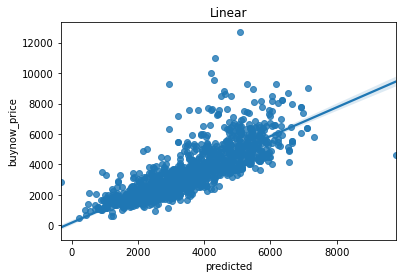

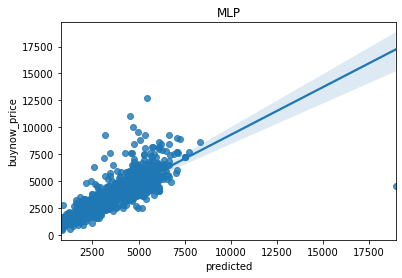

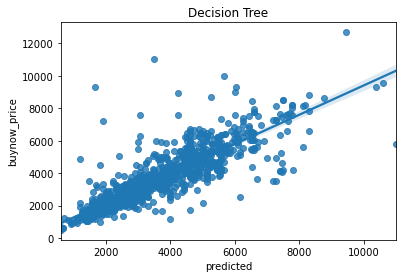

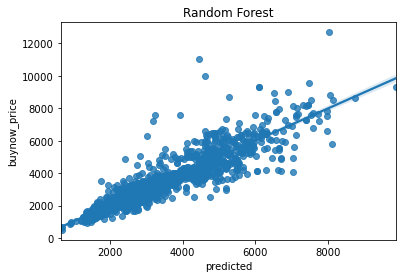

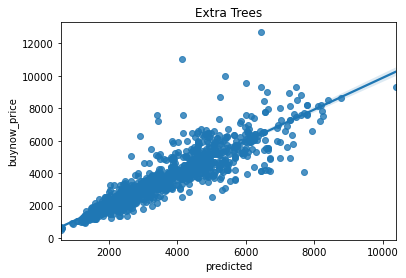

In [133]:
def make_models(model_name, model):
    pipe = make_pipeline(MaxAbsScaler(), model).fit(X_train, y_train)
    predicted = pipe.predict(X_test)
    rmse_val = rmse(y_test, predicted)
    print(model_name, ':', rmse_val)
    pred_df[model_name+'Pred']=predicted
    plt.figure(model_name)
    plt.title(model_name)
    plt.xlabel('predicted')
    plt.ylabel('actual')
    sns.regplot(y=y_test, x=predicted)
    
models = {'Linear' : LinearRegression(),
    'MLP': MLPRegressor(random_state=42, max_iter=500, learning_rate="constant", learning_rate_init=0.6),
    'Decision Tree': DecisionTreeRegressor(max_depth=15, random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
#     'Gradient Boosting': GradientBoostingRegressor(random_state=42, criterion='squared_error',
#                                                   loss='squared_error',learning_rate=0.6, warm_start=True),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100, random_state=42)}

pred_df = pd.DataFrame(columns =["Actual"])
pred_df["Actual"] = y_test

for key in models.keys():
    make_models(key, models[key])

In [134]:
pred_df[:50]

,Actual,LinearPred,MLPPred,Decision TreePred,Random ForestPred,Extra TreesPred
5124,2369.00,3094.098051,2869.014915,2369.000000,2324.233333,2280.800000
9595,2299.00,2722.019341,2546.396370,2299.000000,2360.801667,2299.000000
4926,5999.00,5114.965095,4747.429082,4524.000000,4884.348571,4874.250000
1185,1299.00,1300.916765,1175.664650,1308.900000,1281.382143,1274.000000
6870,3329.00,3592.194436,4242.154015,1890.000000,3634.368900,4153.415900
7762,1749.00,2105.602031,1997.032178,1943.000000,1951.953200,1901.332200
307,2013.00,2538.460677,1692.566395,1801.000000,1800.718771,1711.300000
7151,5103.19,4155.440108,4028.795690,4263.557143,4381.502700,4351.880000
7928,5189.00,4132.493240,4392.294000,4528.700000,4362.780396,4496.150000
3784,2079.00,2212.741995,2101.767531,2449.000000,2205.387225,2184.989450
